# Plots relating oral and cognitive functioning information

In [1]:
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

set style to seaborn ... I don't think "%matplotlib inline" is necessary, pandas might enable this by default

In [2]:
%matplotlib inline
sns.set()

shortcut function for configuring the figure legend  
see https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html for legned spec

In [3]:
def set_legend(ax, title, labels, loc="upper right"):
    hands, labs = ax.get_legend_handles_labels()
    plt.legend(handles=hands, title=title, labels=labels, loc=loc)

create datafarames for deomgraphics, cognitive functioning scrores, and perio info

In [4]:
demo_df = pds.read_table('../refined_data/demographics.tsv',  index_col='SEQN')
cf_df = pds.read_table('../refined_data/cognitive_scores.tsv',  index_col='SEQN')
perio_df = pds.read_table('../refined_data/perio_summary.tsv', index_col='SEQN')

merge dataframes together

In [5]:
# merge demographics, cognitive functioning scores, and perio
merged_df = \
    demo_df.merge(
        cf_df.merge(perio_df, how='inner', on='SEQN'),
        how='inner',
        on='SEQN'
    )
len(merged_df)

314

change valued in gender column to male/female

In [6]:
merged_df.RIAGENDR = np.where(merged_df.RIAGENDR == 1, 'male', 'female')

In [7]:
merged_df.head()

,RIDAGEYR,RIAGENDR,RIDRETH1,RIDRETH3,DMDMARTL,CFDCSR,CFDCIR,CFDAST,CFDDS,z_CFDCSR,...,num_teeth,max_CAL,num_teeth_gt_3,num_teeth_gt_4,num_teeth_gt_5,num_teeth_gt_6,pct_teeth_gt_3,pct_teeth_gt_4,pct_teeth_gt_5,pct_teeth_gt_6
SEQN,,,,,,,,,,,,,,,,,,,,,
62174,80,male,3,3,1.0,5.0,1.0,18.0,33.0,-0.246575,...,27.0,5.0,12.0,3.0,0.0,0.0,44.0,11.0,0.0,0.0
62178,80,male,3,3,2.0,3.0,1.0,12.0,38.0,-1.122787,...,11.0,5.0,1.0,1.0,0.0,0.0,9.0,9.0,0.0,0.0
62215,65,female,3,3,1.0,7.0,0.0,15.0,47.0,0.629636,...,23.0,5.0,9.0,1.0,0.0,0.0,39.0,4.0,0.0,0.0
62217,77,female,1,1,5.0,4.0,0.0,9.0,25.0,-0.684681,...,3.0,17.0,3.0,3.0,3.0,3.0,100.0,100.0,100.0,100.0
62226,80,male,2,2,1.0,3.0,0.0,15.0,30.0,-1.122787,...,7.0,6.0,7.0,5.0,2.0,0.0,100.0,71.0,29.0,0.0


In [8]:
list(merged_df.columns)

['RIDAGEYR',
 'RIAGENDR',
 'RIDRETH1',
 'RIDRETH3',
 'DMDMARTL',
 'CFDCSR',
 'CFDCIR',
 'CFDAST',
 'CFDDS',
 'z_CFDCSR',
 'z_CFDCIR',
 'z_CFDAST',
 'z_CFDDS',
 'z_total',
 'num_teeth',
 'max_CAL',
 'num_teeth_gt_3',
 'num_teeth_gt_4',
 'num_teeth_gt_5',
 'num_teeth_gt_6',
 'pct_teeth_gt_3',
 'pct_teeth_gt_4',
 'pct_teeth_gt_5',
 'pct_teeth_gt_6']

## plot demographics

age & gender distribution

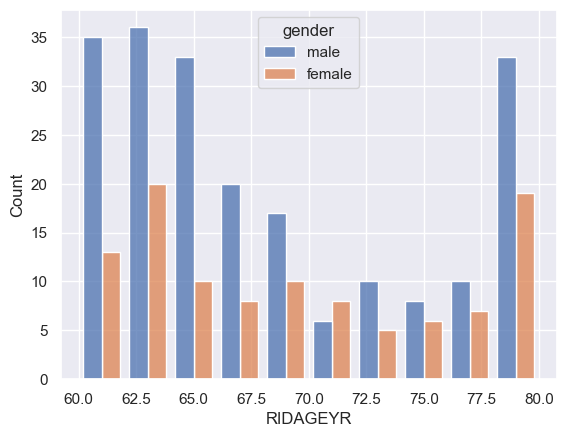

In [9]:
ax = sns.histplot(data=merged_df, x='RIDAGEYR', hue='RIAGENDR',  multiple="dodge", shrink=.8)
ax.get_legend().set_title('gender')
plt.show()

## plot cognitive functioning scores by age and gender

z_total by age and gender

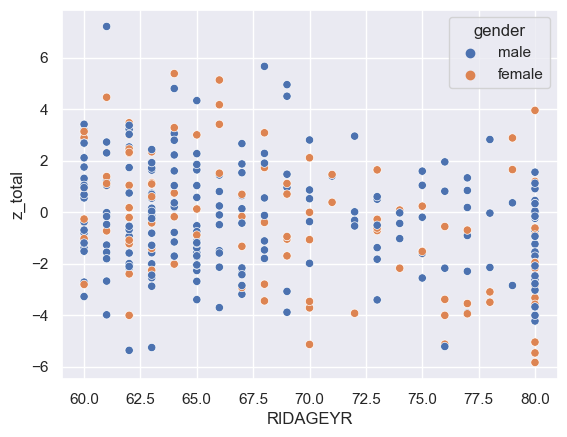

In [10]:
ax = sns.scatterplot(data=merged_df, x='RIDAGEYR', y='z_total', hue='RIAGENDR')
# set_legend(ax, "gender", ["male", "female"])
ax.get_legend().set_title('gender')
plt.show()

---

CFDAST - Animal Fluency: Score Total by age & gender

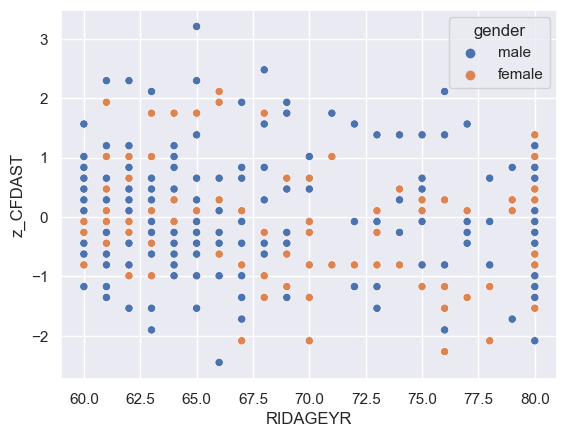

In [11]:
ax = sns.scatterplot(data=merged_df, x='RIDAGEYR', y='z_CFDAST', hue='RIAGENDR')
# set_legend(ax, "gender", ["male", "female"])
ax.get_legend().set_title('gender')
plt.show()

---

CFDCSR - CERAD: Score Delayed Recall by age and gender

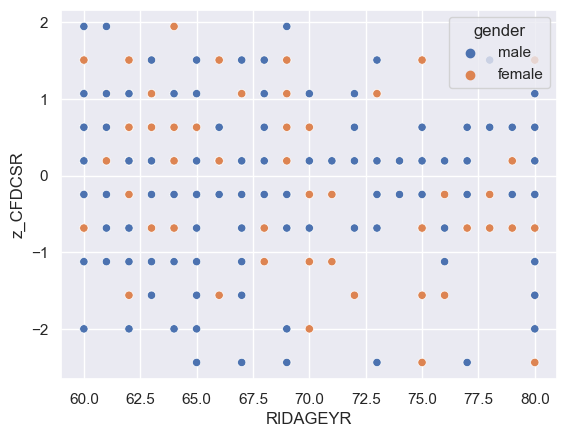

In [12]:
ax = sns.scatterplot(data=merged_df, x='RIDAGEYR', y='z_CFDCSR', hue='RIAGENDR')
ax.get_legend().set_title('gender')
plt.show()

----

 CFDCIR - CERAD: Intrusion word count Recall by age and gender

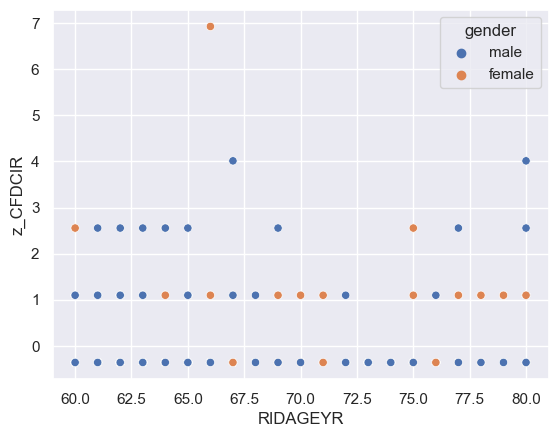

In [13]:
ax = sns.scatterplot(data=merged_df, x='RIDAGEYR', y='z_CFDCIR', hue='RIAGENDR')
ax.get_legend().set_title('gender')
plt.show()

---

 CFDDS - Digit Symbol: Score by age and gender

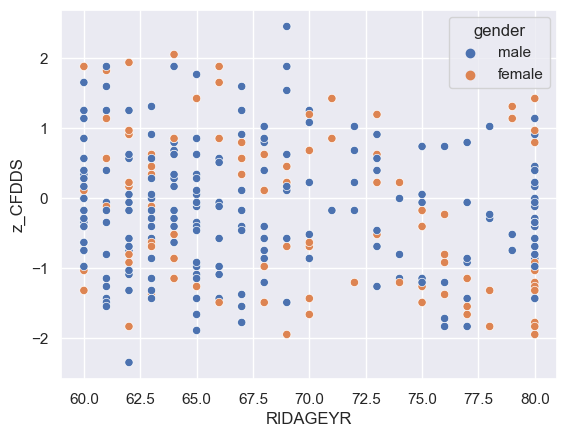

In [14]:
ax = sns.scatterplot(data=merged_df, x='RIDAGEYR', y='z_CFDDS', hue='RIAGENDR')
ax.get_legend().set_title('gender')
plt.show()

## cognitive scrore by age, gender, and number of teeth wit CAL > 3mm

In [15]:
size_range = (merged_df.num_teeth_gt_3.min() + 1, merged_df.num_teeth_gt_3.max())
size_range

(2.0, 28.0)

by z_total

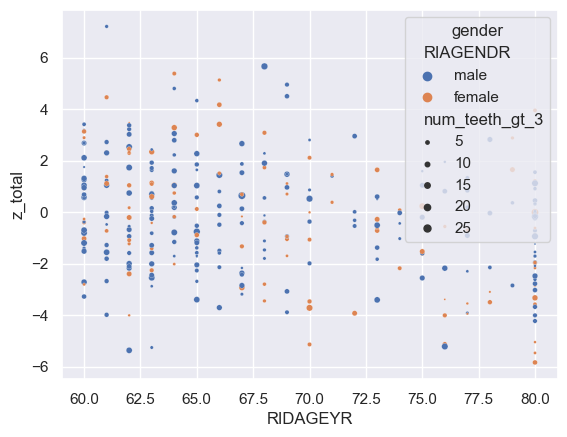

In [16]:
ax = sns.scatterplot(data=merged_df, x='RIDAGEYR', y='z_total', hue='RIAGENDR', size='num_teeth_gt_3', sizes=size_range)
ax.get_legend().set_title('gender')
plt.show()

---

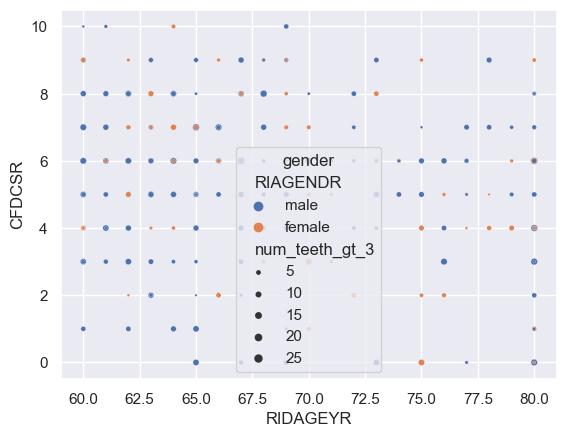

In [17]:
ax = sns.scatterplot(data=merged_df, x='RIDAGEYR', y='CFDCSR', hue='RIAGENDR', size='num_teeth_gt_3', sizes=size_range)
ax.get_legend().set_title('gender')
plt.show()

In [18]:
merged_df[merged_df.num_teeth_gt_3 > 0].CFDAST.median()

15.5

mean CFDAST: 15.996815286624203
median CFDAST: 15.5


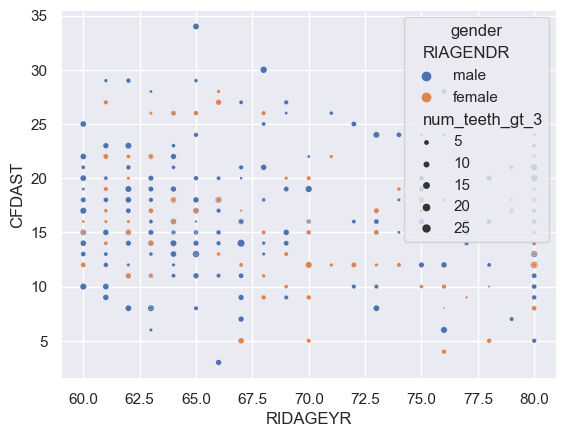

In [19]:
print('mean CFDAST:', merged_df.CFDAST.mean())
print('median CFDAST:', merged_df.CFDAST.median())
ax = sns.scatterplot(data=merged_df, x='RIDAGEYR', y='CFDAST', hue='RIAGENDR', size='num_teeth_gt_3', sizes=size_range)
# set_legend(ax, "gender", ["male", "female"])
ax.get_legend().set_title('gender')
plt.show()

In [20]:
len(merged_df[merged_df.num_teeth_gt_3 > 0])

314

In [21]:
len(merged_df[merged_df.num_teeth_gt_3 < 1]) + len(merged_df[merged_df.num_teeth_gt_3 > 0])

314

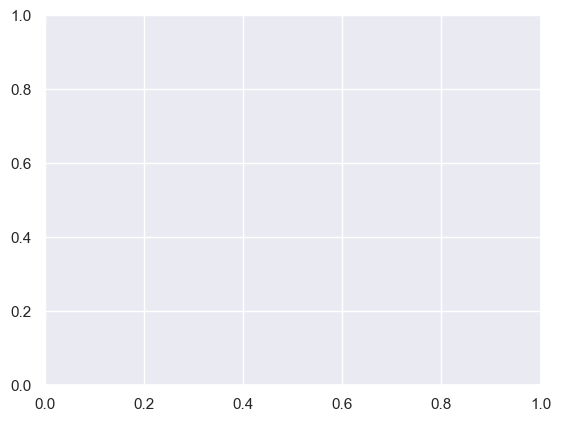

In [22]:
ax = sns.scatterplot(data= merged_df[merged_df.num_teeth_gt_3 < 1], x='RIDAGEYR', y='CFDAST', hue='RIAGENDR')
plt.show()

merged_df[merged_df.num_teeth_gt_3 > 0]: 314


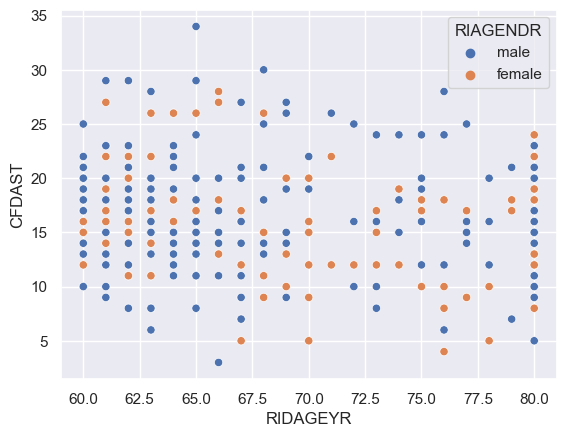

In [23]:
print('merged_df[merged_df.num_teeth_gt_3 > 0]:', len(merged_df[merged_df.num_teeth_gt_3 > 0]))
ax = sns.scatterplot(data= merged_df[merged_df.num_teeth_gt_3 > 0], x='RIDAGEYR', y='CFDAST', hue='RIAGENDR')
plt.show()

merged_df[merged_df.num_teeth_gt_4 > 0]: 312


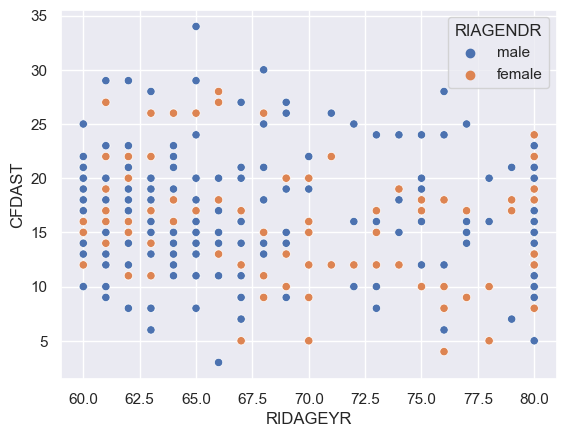

In [24]:
print('merged_df[merged_df.num_teeth_gt_4 > 0]:', len(merged_df[merged_df.num_teeth_gt_4 > 0]))
ax = sns.scatterplot(data= merged_df[merged_df.num_teeth_gt_4 > 0], x='RIDAGEYR', y='CFDAST', hue='RIAGENDR')
plt.show()

merged_df[merged_df.num_teeth_gt_5 > 0]: 295


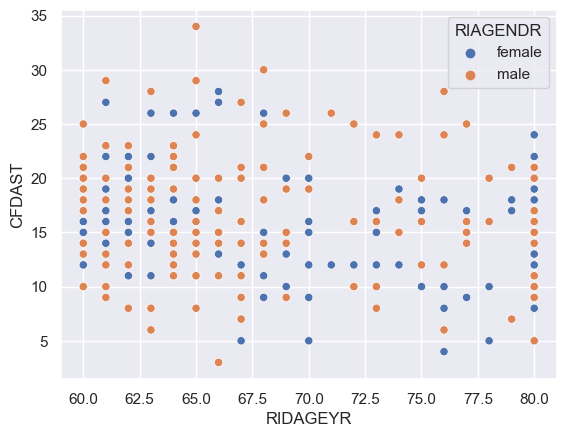

In [25]:
print('merged_df[merged_df.num_teeth_gt_5 > 0]:', len(merged_df[merged_df.num_teeth_gt_5 > 0]))
ax = sns.scatterplot(data= merged_df[merged_df.num_teeth_gt_5 > 0], x='RIDAGEYR', y='CFDAST', hue='RIAGENDR')
plt.show()

In [26]:
merged_df.z_total.mean()

-0.2697452229299363

In [27]:
merged_df.z_total.median()

-0.26

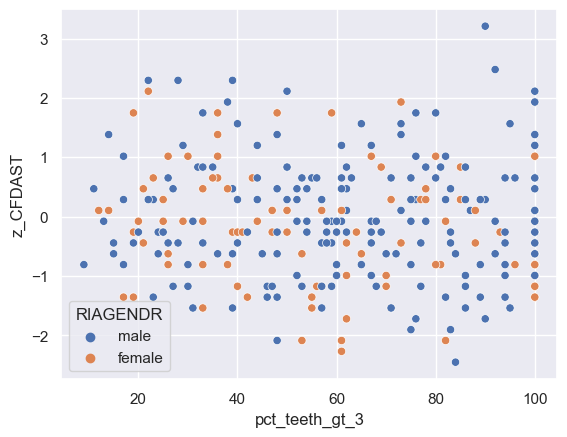

In [28]:
ax = sns.scatterplot(data=merged_df, x='pct_teeth_gt_3', y='z_CFDAST', hue='RIAGENDR')
plt.show()

In [29]:
list(merged_df.columns)

['RIDAGEYR',
 'RIAGENDR',
 'RIDRETH1',
 'RIDRETH3',
 'DMDMARTL',
 'CFDCSR',
 'CFDCIR',
 'CFDAST',
 'CFDDS',
 'z_CFDCSR',
 'z_CFDCIR',
 'z_CFDAST',
 'z_CFDDS',
 'z_total',
 'num_teeth',
 'max_CAL',
 'num_teeth_gt_3',
 'num_teeth_gt_4',
 'num_teeth_gt_5',
 'num_teeth_gt_6',
 'pct_teeth_gt_3',
 'pct_teeth_gt_4',
 'pct_teeth_gt_5',
 'pct_teeth_gt_6']

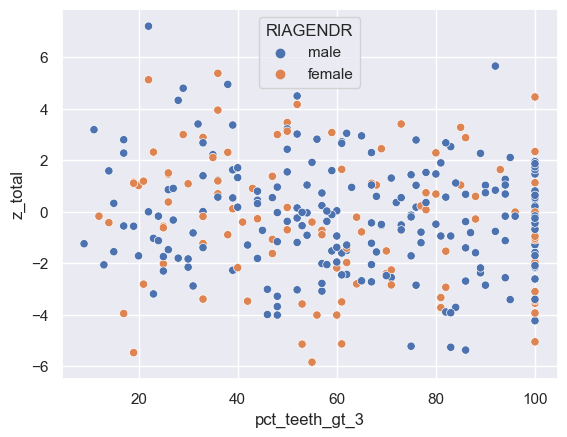

In [30]:
ax = sns.scatterplot(data=merged_df, x='pct_teeth_gt_3', y='z_total', hue='RIAGENDR')
plt.show()